# Introduction into Data Science with Python

## Preface

Over the last decades statistical analysis becomes more and more complex. Statisticians needs for software and machines to compute large matrices with complex operations arises. Since measurement has become more accurate, storage is easy to access/ share and the awareness that tracked data can be useful later for researcher of all fields, the amount of data available is tremendous. Therefore, modern statistical software also needs handle with large dataset, while providing efficient algorithms.

Statistics Software available:

    A. Proprietary
        - SPSS
        - STATA
        - GRETL
        - EViews
        - GAUSS
        - Matlab
        ...
    B: Open Source
        - R
        - Python
        - Julia
        - Octave
        ...
        
Currently, *Open Source* software is very popular:
    - free to use
    - support in forums from statisticians, scientists and professionals 
    - infinitely expandable by user-based packages
    - very easy to start group project since it's free
    
Why to use **Python**?<br>
<b>R</b> is widely used in all fields, providing a large amount on packages and with a very responsive fan-base providing support. It's still very slow in computing, requires a lot of computing performance and is not as easy to read the code as <b>Python</b>. For example, <b>R</b>-code requires many different *brackets* depending on their usage. Mixing up these *brackets* or missing one leads to errors in the code.<br>
Here <b>Python</b> shines with code easy to read and as a programming language mainly used to engineer software it provides a huge potential. Here the first difference appears. Since, <b>Python</b> is a programming language we first need to load packages which include functions and operations we later want to use for our analysis. For users of proprietary statistic software it might be uncontentious, to load packages to compute basic statistics.  

We use <b>Python</b> together with the Jupyter-Notebook Editor. Further information regarding the Editor can be found [here](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)

In [7]:
###############################################
### Introduction into Python
###############################################

## Preface - loading packages
import sys                        # package for System-specific parameters and functions in Python
import numpy as np                # scientific operations
import pandas as pd               # package for DataFrames and related functions
import statsmodels.api as sm      # selecting *.api since there are different versions available (*.api is designed to work with pandas)
import statsmodels.formula.api as smf  # for more advanced regression models
from patsy import dmatrices       # using the dmatrices function from the patsy package
import matplotlib.pyplot as plt   # package to producing graphs and plots
import scipy.stats as ss          # scientific operations
import seaborn as sns             # package based on matplotlib

## Preface - setting some global options
# %matplotlib inline              # procudes the output inline with the Notebook

## Basic operations in Python

In [124]:
## Basic operations
# storing and computation
a=4
b=5
a+b

9

In [125]:
# Output 
print("Hello")

Hello


In [126]:
# IF Statements
if a == 4:
    print('a is four')
elif b == 5:
    print('b is five')
else:
    print('a is not four and b not five')

a is four


In [127]:
# Loops
for i in ["First", "Second", "Thrid"]:
    print(i, "rank")

First rank
Second rank
Thrid rank


In [128]:
for i in range(1,4): 
    print(i)

1
2
3


In [129]:
my_list = [1, 2, 3]
for i in my_list: 
    print(i)

1
2
3


In [130]:
# Functions
my_list = [0,1,2,3,4,5,6,7,8,9,10]
def func(x):
    res=0
    for i in x:
        if i>5:
         res = res + i
    return res

func(my_list)

40

In [131]:
# consulting the help-file
help(sum)

Help on built-in function sum in module builtins:

sum(iterable, start=0, /)
    Return the sum of a 'start' value (default: 0) plus an iterable of numbers
    
    When the iterable is empty, return the start value.
    This function is intended specifically for use with numeric values and may
    reject non-numeric types.



## Importing Data using Pandas package

In [132]:
# reading a stata file using the pandas package as "pd"
df = pd.read_stata('nswre74.dta')
df.head()

,treat,age,ed,black,hisp,married,nodeg,re74,re75,re78,age2
0,1,37,11,1,0,1,1,0.0,0.0,9930.045898,1369.0
1,1,22,9,0,1,0,1,0.0,0.0,3595.894043,484.0
2,1,30,12,1,0,0,0,0.0,0.0,24909.449219,900.0
3,1,27,11,1,0,0,1,0.0,0.0,7506.145996,729.0
4,1,33,8,1,0,0,1,0.0,0.0,289.789886,1089.0


In [133]:
df.describe()

,treat,age,ed,black,hisp,married,nodeg,re74,re75,re78,age2
count,445.000000,445.000000,445.000000,445.000000,445.00000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,0.415730,25.370787,10.195506,0.833708,0.08764,0.168539,0.782022,2102.265381,1377.138306,5300.764160,693.977539
std,0.493402,7.100282,1.792119,0.372762,0.28309,0.374766,0.413337,5363.582520,3150.960693,6631.491699,429.781799
min,0.000000,17.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,289.000000
25%,0.000000,20.000000,9.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,400.000000
50%,0.000000,24.000000,10.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,3701.812012,576.000000
75%,1.000000,28.000000,11.000000,1.000000,0.00000,0.000000,1.000000,824.388916,1220.836060,8124.714844,784.000000
max,1.000000,55.000000,16.000000,1.000000,1.00000,1.000000,1.000000,39570.679688,25142.240234,60307.929688,3025.000000


Text(0, 0.5, 're74')

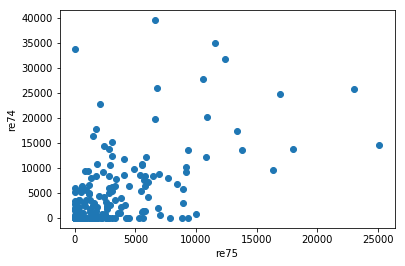

In [134]:
# producing a simple scatter plot
plt.scatter(df.re75, df.re74)
plt.xlabel('re75')
plt.ylabel('re74')

## Regressions in Python using Statsmodels package

In [135]:
# using statsmodels as "sm"
y, x = dmatrices('re78 ~ treat + black', data = df)

model_spec = sm.OLS(y, x)
results = model_spec.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   re78   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     7.239
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           0.000806
Time:                        13:57:46   Log-Likelihood:                -4539.6
No. Observations:                 445   AIC:                             9085.
Df Residuals:                     442   BIC:                             9097.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6289.1908    799.274      7.869      0.0

### Robust OLS

In [136]:
# Robust Regression with FE
y, x = dmatrices('re78 ~ treat + black', data = df)

model_spec = sm.RLM(y, x, M=sm.robust.norms.HuberT())
results = model_spec.fit()

print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                   re78   No. Observations:                  445
Model:                            RLM   Df Residuals:                      442
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 17 Apr 2019                                         
Time:                        13:57:47                                         
No. Iterations:                     8                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6081.4310    604.822     10.055      0.0

### OLS with HAC standard errors

In [137]:
# Robust Regression with FE
y, x = dmatrices('re78 ~ treat + black', data = df)

model_spec = sm.OLS(y, x)
results = model_spec.fit(cov_type='HAC',cov_kwds={'maxlags':1})

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   re78   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     8.964
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           0.000153
Time:                        13:57:48   Log-Likelihood:                -4539.6
No. Observations:                 445   AIC:                             9085.
Df Residuals:                     442   BIC:                             9097.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6289.1908    676.559      9.296      0.0

## Random numbers and data generating processes (DGP)

### Random numbers

In [138]:
np.random.seed(123)       # set seed to ensure reproducibility
A = np.random.rand(3,2)   # generating a 3X2 random matrix 
A

array([[0.69646919, 0.28613933],
       [0.22685145, 0.55131477],
       [0.71946897, 0.42310646]])

In [139]:
B = np.random.binomial(100, 0.5)   # generating binomial(n,p)
B

43

In [140]:
C = np.random.uniform(0, 1, 100)   # generating binomial(low,upper, n)
C

array([0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426,
       0.73799541, 0.18249173, 0.17545176, 0.53155137, 0.53182759,
       0.63440096, 0.84943179, 0.72445532, 0.61102351, 0.72244338,
       0.32295891, 0.36178866, 0.22826323, 0.29371405, 0.63097612,
       0.09210494, 0.43370117, 0.43086276, 0.4936851 , 0.42583029,
       0.31226122, 0.42635131, 0.89338916, 0.94416002, 0.50183668,
       0.62395295, 0.1156184 , 0.31728548, 0.41482621, 0.86630916,
       0.25045537, 0.48303426, 0.98555979, 0.51948512, 0.61289453,
       0.12062867, 0.8263408 , 0.60306013, 0.54506801, 0.34276383,
       0.30412079, 0.41702221, 0.68130077, 0.87545684, 0.51042234,
       0.66931378, 0.58593655, 0.6249035 , 0.67468905, 0.84234244,
       0.08319499, 0.76368284, 0.24366637, 0.19422296, 0.57245696,
       0.09571252, 0.88532683, 0.62724897, 0.72341636, 0.01612921,
       0.59443188, 0.55678519, 0.15895964, 0.15307052, 0.69552953,
       0.31876643, 0.6919703 , 0.55438325, 0.38895057, 0.92513

Text(0, 0.5, 'Density')

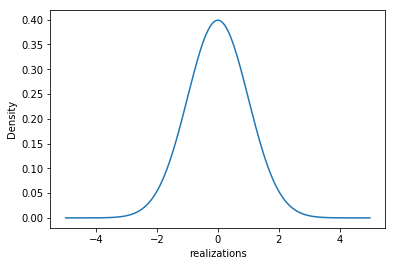

In [141]:
# Creating random data, calculating density function and plot
figure, aux = plt.subplots(1, 1)
x = np.linspace(-5, 5, 1500)      # Return evenly spaced numbers over a specified interval. (start, stop, number)
pdf = ss.norm.pdf(x, 0, 1)       # normal distributed probability function with zero mean and variance of 1
aux.plot(x, pdf)

# plotting options
aux.set_xlabel('realizations')
aux.set_ylabel('Density')
#aux.set_xticklabels(['', '', '', 0.5, '', '', ''])
#aux.set_xlim([-3, 3])
#aux.set_ylim([0, 0.5]);

### Data generating process (DGP) 

In [16]:
Num= 1000       # number of observations

alpha = 0.8
beta  = 0.5

data = np.tile(np.nan, (Num, 2))
for i in range(Num):
    X      = np.random.uniform() 
    res    = np.random.normal()
    Y      = alpha + beta*X + res
    data[i, :] = [Y, X]

df=pd.DataFrame(data, columns=['Y','X'])

y, x = dmatrices('Y ~ X', data = df)

model_spec = sm.OLS(y, x)
results = model_spec.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     12.55
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           0.000415
Time:                        14:52:39   Log-Likelihood:                -1427.3
No. Observations:                1000   AIC:                             2859.
Df Residuals:                     998   BIC:                             2868.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8778      0.063     14.043      0.0

### Resampling data

In [144]:
df.describe()    #Lalonde Dataset

,treat,age,ed,black,hisp,married,nodeg,re74,re75,re78,age2
count,445.000000,445.000000,445.000000,445.000000,445.00000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,0.415730,25.370787,10.195506,0.833708,0.08764,0.168539,0.782022,2102.265381,1377.138306,5300.764160,693.977539
std,0.493402,7.100282,1.792119,0.372762,0.28309,0.374766,0.413337,5363.582520,3150.960693,6631.491699,429.781799
min,0.000000,17.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,289.000000
25%,0.000000,20.000000,9.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,400.000000
50%,0.000000,24.000000,10.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,3701.812012,576.000000
75%,1.000000,28.000000,11.000000,1.000000,0.00000,0.000000,1.000000,824.388916,1220.836060,8124.714844,784.000000
max,1.000000,55.000000,16.000000,1.000000,1.00000,1.000000,1.000000,39570.679688,25142.240234,60307.929688,3025.000000


Our estimated treatment effect is    1787.05


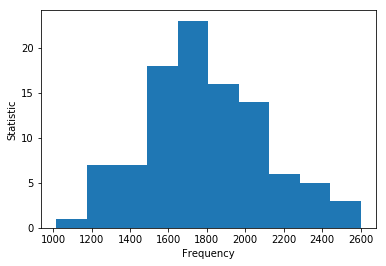

In [150]:
# creating variables for further use
is_treated = df['treat'] == 1
df['Y'] = df['re78']
df['Y_0'] = df.loc[~is_treated, 're78']
df['Y_1'] = df.loc[is_treated, 're78']
df['D'] = np.nan
df.loc[~is_treated, 'D'] = 0
df.loc[is_treated, 'D'] = 1

# set the seed for reproduceability
np.random.seed(123)
# caluclate the size of Treatment group
status_counts = df['D'].value_counts().to_dict()

stats = list()
for _ in range(100):
    Y_1_sampled = df['Y_1'].dropna().sample(n=status_counts[0], replace=True).values
    Y_0_sampled = df['Y_0'].dropna().sample(n=status_counts[1], replace=True).values

    df_boot = df.copy()

    df_boot.loc[df_boot['D'] == 1, 'Y_0'] = Y_0_sampled
    df_boot.loc[df_boot['D'] == 0, 'Y_1'] = Y_1_sampled
    
    stat = (df_boot['Y_1'] - df_boot['Y_0']).mean()
    stats.append(stat)
print('Our estimated treatment effect is {:10.2f}'.format(np.mean(stats)))
fig, ax = plt.subplots(1, 1)
ax.hist(stats)
ax.set_ylabel('Statistic')
ax.set_xlabel('Frequency');

## Robust Regression example

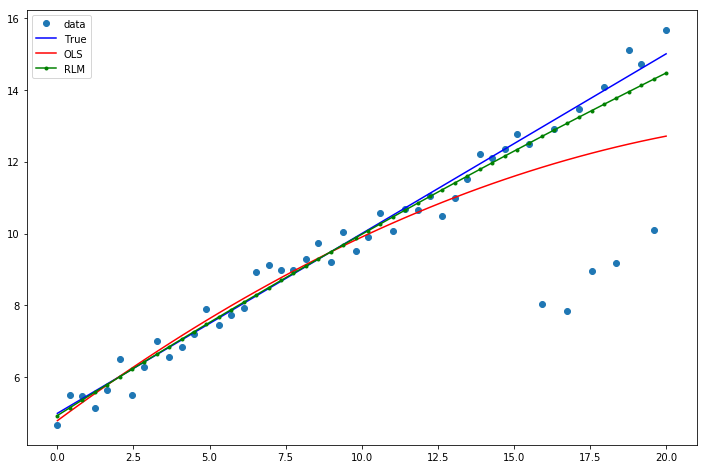

In [151]:
np.random.seed(123) 
nsample = 50
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, (x1-5)**2))
X = sm.add_constant(X)
sig = 0.3                                         # smaller error variance makes OLS<->RLM contrast bigger
beta = [5, 0.5, -0.0]
y_true2 = np.dot(X, beta)
y2 = y_true2 + sig*1. * np.random.normal(size=nsample)
y2[[39,41,43,45,48]] -= 5                         # add some outliers (10% of nsample)

res = sm.OLS(y2, X).fit()
resrlm = sm.RLM(y2, X).fit()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(x1, y2, 'o',label="data")
ax.plot(x1, y_true2, 'b-', label="True")
ax.plot(x1, res.fittedvalues, 'r-', label="OLS")
ax.plot(x1, resrlm.fittedvalues, 'g.-', label="RLM")
ax.legend(loc="best")

## Loading Data using API

### World bank data 

In [1]:
#!pip install wbdata # we need to install a third-party package
import wbdata       # easy access to World Bank data
 
# source: https://data.worldbank.org/indicator/sp.dyn.cbrt.in
indicators = {'SP.DYN.CBRT.IN':'Birth rate'}
df = wbdata.get_dataframe(indicators, country=["JP"], convert_date=False)

df.sort_index(inplace=True)       # sort by year
df.index = df.index.astype(int)   # format index to integer type
df.head()

Invalid requirement: '#'



,Birth rate
date,
1960,17.3
1961,17.0
1962,17.1
1963,17.4
1964,17.8


### Quandl API for multiple sources

In [5]:
#!pip install quandl
# note for more than 50 data requests you need to sign up
# quandl.ApiConfig.api_key = "YOUR_KEY_HERE"

import quandl

df = quandl.get("FRED/GDP", collapse="monthly")
df.head()

LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.